In [2]:
#import packages
import sys
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

#check python and nx versions
print(f"Python version {sys.version}")
print(f"networkx version: {nx.__version__}")

Python version 3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]
networkx version: 2.7.1


In [3]:
#import ZKC graph
ZKC_graph = nx.karate_club_graph()

#Track John A and mr Hi
Mr_Hi = 0
John_A = 33

#display labels of which club each member ended up joining
club_labels = nx.get_node_attributes(ZKC_graph, 'club')

#do't show all labels
print({key:club_labels[key] for key in range(10,16)})

{10: 'Mr. Hi', 11: 'Mr. Hi', 12: 'Mr. Hi', 13: 'Mr. Hi', 14: 'Officer', 15: 'Officer'}


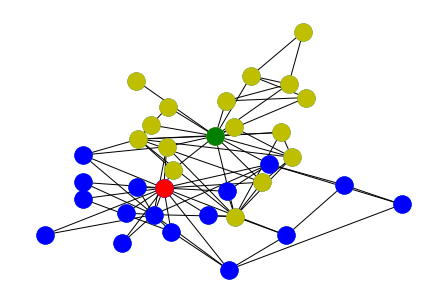

In [4]:
circ_pos = nx.circular_layout(ZKC_graph)
kaka_pos = nx.kamada_kawai_layout(ZKC_graph)
#planar_pos = nx.planar_layout(ZKC_graph) #Fails
#rescale_pos = nx.rescale_layout(ZKC_graph)
spring_pos = nx.spring_layout(ZKC_graph)
spectral_pos = nx.spectral_layout(ZKC_graph)

layout = kaka_pos

nx.draw(ZKC_graph, layout)


for i in range(34):
    #print(str(i)+" "+club_labels[i])
    if club_labels[i] == 'Mr. Hi':
        nx.draw_networkx_nodes(ZKC_graph, layout, nodelist=[i], node_color='y', alpha=1)
    else:
        nx.draw_networkx_nodes(ZKC_graph, layout, nodelist=[i], node_color='b', alpha=1)
        

nx.draw_networkx_nodes(ZKC_graph, layout, nodelist=[Mr_Hi], node_color='g', alpha=1)
nx.draw_networkx_nodes(ZKC_graph, layout, nodelist=[John_A], node_color='r', alpha=1)



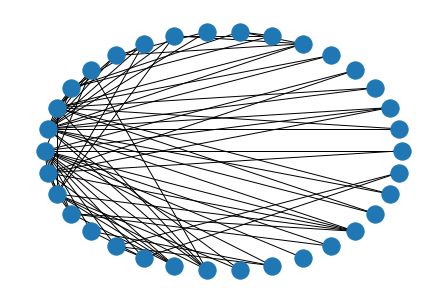

In [5]:
nx.draw_shell(ZKC_graph)

In [6]:
density = nx.density(ZKC_graph)

print("Theedge density is: " + str(density))

Theedge density is: 0.13903743315508021


In [7]:
degree = ZKC_graph.degree()

degree_list = []

for (n,d) in degree:
    degree_list.append(d)

av_degree = sum(degree_list) / len(degree_list)

print("The average degree is " + str(av_degree))

The average degree is 4.588235294117647


Text(0.5, 1.0, 'Karate Club: Node Degree')

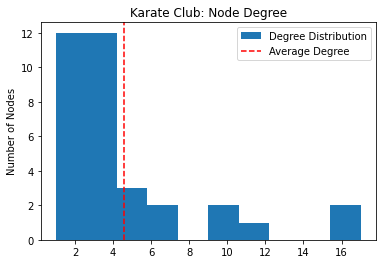

In [8]:
#Plot the degree distribution

from cProfile import label


plt.hist(degree_list, label='Degree Distribution')
plt.axvline(av_degree, color='r', linestyle='dashed', label='Average Degree')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Karate Club: Node Degree')

In [9]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

c = list(greedy_modularity_communities(ZKC_graph))

print(len(c))

3


In [10]:
#Lets see these 3 clusters
community_0 = sorted(c[0])
community_1 = sorted(c[1])
community_2 = sorted(c[2])

print(community_0)
print(community_1)
print(community_2)

[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[1, 2, 3, 7, 9, 12, 13, 17, 21]
[0, 4, 5, 6, 10, 11, 16, 19]


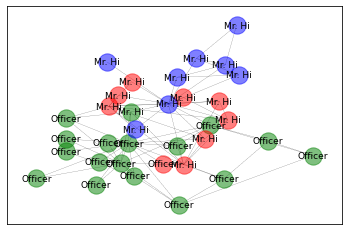

In [11]:
nx.draw_networkx_nodes(ZKC_graph,kaka_pos, nodelist=community_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(ZKC_graph,kaka_pos, nodelist=community_1, node_color='r', alpha=0.5)
nx.draw_networkx_nodes(ZKC_graph,kaka_pos, nodelist=community_2, node_color='b', alpha=0.5)

nx.draw_networkx_labels(ZKC_graph, kaka_pos, club_labels, font_size=9)

nx.draw_networkx_edges(ZKC_graph, kaka_pos, style='dashed', width=0.2)


In [12]:
print(ZKC_graph)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges
